**Project 1 CITS4012**

- Jason Veljanoski
- 21980294
- September 2021

In [1]:
import matplotlib.pyplot as plt

## center figs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 1. Load

Let us read the `json` file as a dataframe and clean it up in the next sections.

In [2]:
## dataframe of unflattened data
import os.path
import pandas as pd

fname = 'frames.json'
path = os.path.join('data', fname)

frames = pd.read_json(path)

In [3]:
## raw json
import os.path
import json

fname = 'frames.json'
path = os.path.join('data', fname)
  
## opening JSON file
f = open(path,)
  
## returns JSON object as dictionary
frames_json = json.load(f)

## closing file
f.close()

___

# 2. Data exploration.

### 2.1 What's the struture of a converstation in the frames.json file? Display it as a table.

Let us flatten the json file into multiple tables akin to that shown [here](https://www.microsoft.com/en-us/research/project/frames-dataset/#!download).

**Global properties**

- `id [pk]`: Refers to a unique identification for the dialogue.
- `user_id`: Refers to a unique identifier for the user taking part in the dialogue.
- `wisard_id`: Refers to a unique identifier for the wizard taking part in the dialogue.

In [5]:
## Global Properties.
global_properties = frames[['id', 'user_id', 'wizard_id']]

global_properties.head()

,id,user_id,wizard_id
0,e2c0fc6c-2134-4891-8353-ef16d8412c9a,U22HTHYNP,U21DKG18C
1,4a3bfa39-2c22-42c8-8694-32b4e34415e9,U21E41CQP,U21DMV0KA
2,6e67ed28-e94c-4fab-96b6-68569a92682f,U21RP4FCY,U21E0179B
3,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,U22HTHYNP,U21DKG18C
4,24603086-bb53-431e-a0d8-1dcc63518ba9,U21E41CQP,U21DMV0KA


**Labels**

- `id [pk]`: Refers to a unique identification for the dialogue.
- `userSurveyRating`: A value that represents the user’s satisfaction with the Wizard’s service, ranging from 1 – complete dissatisfaction to 5 – complete satisfaction.
- `wizardSurveyTaskSuccessful`: A boolean which is true if the wizard thinks at the end of the dialogue that the user’s goal was achieved.

In [6]:
## Labels.
labels = pd.DataFrame(list(frames.labels))
labels['id'] = global_properties['id'] ## foreign key

labels.head()

,userSurveyRating,wizardSurveyTaskSuccessful,id
0,4.0,True,e2c0fc6c-2134-4891-8353-ef16d8412c9a
1,3.0,True,4a3bfa39-2c22-42c8-8694-32b4e34415e9
2,2.0,False,6e67ed28-e94c-4fab-96b6-68569a92682f
3,5.0,True,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa
4,5.0,True,24603086-bb53-431e-a0d8-1dcc63518ba9


**Turns**

- `id [fk]`: Refers to a unique identification for the dialogue.
- `author`: The author of the message in a dialogue. i.e. “user” or “wizard”.
- `text`: The sentence that the author uttered. It is the exact text that the author of a turn said. E.g. “text”: “Consider it done. Have a great trip!”.
- `timestamp`: Unix timestamp denoting the time at which the current turn occurred.
- `labels.acts [flattened]`: The `acts` are the dialogue acts for the current utterance. Each act has a name and arguments args. The name is the name of the dialogue act, for instance, offer, or inform. The args contain the slot types (key) and slot values (val), for instance budget=2000. Slot values are optional. An act contains a ref tag whenever a user or wizard refers to a past frame.
- `labels.active_frame [fk]`: The `active_frame` is the id of the currently active frame. 

In [7]:
## Turns.
turns_unstructured = pd.json_normalize(frames_json, record_path = ['turns'], meta=['id'])

turns_unstructured.head()

,text,author,timestamp,labels.acts,labels.acts_without_refs,labels.active_frame,labels.frames,db.result,db.search,id
0,I'd like to book a trip to Atlantis from Capri...,user,1.471272e+12,"[{'args': [{'val': 'book', 'key': 'intent'}], ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",1,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN,e2c0fc6c-2134-4891-8353-ef16d8412c9a
1,"Hi...I checked a few options for you, and unfo...",wizard,1.471272e+12,"[{'args': [{'val': [{'annotations': [], 'frame...",NaN,1,"[{'info': {'intent': [{'val': 'book', 'negated...",[[{'trip': {'returning': {'duration': {'hours'...,"[{'ORIGIN_CITY': 'Porto Alegre', 'PRICE_MIN': ...",e2c0fc6c-2134-4891-8353-ef16d8412c9a
2,"Yes, how about going to Neverland from Caprica...",user,1.471273e+12,"[{'args': [{'val': 'Neverland', 'key': 'dst_ci...","[{'args': [{'val': 'Neverland', 'key': 'dst_ci...",2,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN,e2c0fc6c-2134-4891-8353-ef16d8412c9a
3,I checked the availability for this date and t...,wizard,1.471273e+12,[{'args': [{'val': [{'annotations': [{'val': N...,NaN,2,"[{'info': {'intent': [{'val': 'book', 'negated...","[[], [], [], [], [], []]","[{'ORIGIN_CITY': 'Caprica', 'PRICE_MIN': '1700...",e2c0fc6c-2134-4891-8353-ef16d8412c9a
4,I have no flexibility for dates... but I can l...,user,1.471273e+12,"[{'args': [{'val': False, 'key': 'flex'}], 'na...","[{'args': [{'val': False, 'key': 'flex'}], 'na...",3,"[{'info': {'intent': [{'val': 'book', 'negated...",NaN,NaN,e2c0fc6c-2134-4891-8353-ef16d8412c9a


In [8]:
def acts_to_dict(acts_list):
    """ Takes a single acts list (e.g. turns_unstructured['labels.acts'][0]) and flattens it into a reasonable dict format
    """
    acts_dict = {}
    for act in acts:
        name = act['name']
        args = act['args']

        for d in args:

            ## if key is ref, only provide frame_id
            if d['key'] == 'ref':
                acts_dict[f"{name}_{d['key']}"] = d['val'][0]['frame']
            ## vals are optional from documentation
            elif 'val' in d.keys():
                acts_dict[f"{name}_{d['key']}"] = d['val']
    
    return acts_dict


## flatten all acts lists in our turns df
turns_labels_acts = []
for acts in turns_unstructured['labels.acts']:
    turns_labels_acts.append( acts_to_dict(acts) )
    
## convert result to a df
labels_acts = pd.DataFrame(turns_labels_acts)

labels_acts.head()

,inform_intent,inform_dst_city,inform_or_city,inform_str_date,inform_n_adults,inform_budget,no_result_ref,inform_ref,inform_flex,negate_ref,...,request_seat_ok,request_alts_n_adults,request_museum,offer_vicinity,inform_dst_city_ok,inform_impl_anaphora,confirm_beach,offer_str_date_ok,offer_end_date_ok,request_shopping
0,book,Atlantis,Caprica,"Saturday, August 13, 2016",8,1700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Neverland,NaN,NaN,5,1900,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Atlantis,NaN,NaN,NaN,NaN,NaN,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## then concatenate the resulting dfs
#
# we will remove db.result, db.search, and labels.acts_without_refs as they are less useful for our project
turns = pd.concat([turns_unstructured, labels_acts], axis=1).drop(columns=['labels.acts','labels.acts_without_refs','labels.frames','db.result','db.search'])

turns.head()

,text,author,timestamp,labels.active_frame,id,inform_intent,inform_dst_city,inform_or_city,inform_str_date,inform_n_adults,...,request_seat_ok,request_alts_n_adults,request_museum,offer_vicinity,inform_dst_city_ok,inform_impl_anaphora,confirm_beach,offer_str_date_ok,offer_end_date_ok,request_shopping
0,I'd like to book a trip to Atlantis from Capri...,user,1.471272e+12,1,e2c0fc6c-2134-4891-8353-ef16d8412c9a,book,Atlantis,Caprica,"Saturday, August 13, 2016",8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Hi...I checked a few options for you, and unfo...",wizard,1.471272e+12,1,e2c0fc6c-2134-4891-8353-ef16d8412c9a,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Yes, how about going to Neverland from Caprica...",user,1.471273e+12,2,e2c0fc6c-2134-4891-8353-ef16d8412c9a,NaN,Neverland,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I checked the availability for this date and t...,wizard,1.471273e+12,2,e2c0fc6c-2134-4891-8353-ef16d8412c9a,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I have no flexibility for dates... but I can l...,user,1.471273e+12,3,e2c0fc6c-2134-4891-8353-ef16d8412c9a,NaN,NaN,Atlantis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Frames**

- `frame_id [pk]`: Id of the frame.
- `frame_parent_id`: Id of the parent frame.
- `requests`: Questions related to one frame, for instance “what is the price of this package?”.
- `compare_requests`: Concern several frames. For example, the user might ask to compare different packages: “What is the guest rating of these two hotels?”.
- `binary_questions` Questions with both a slot type and a slot value. These are special cases of `requests` and `compare_requests`, for instance “are both hotels 3.5 stars?”.
- `info [flattened]`: The info contains all the constraints set by the user or the wizard in the frame. These constraints are expressed as slot types which have a value. Note that each slot can have multiple values, which accumulate as long as the frame does not change. For example, the price can be both “1000 USD” and “cheapest”. There are two additional fields to keep track of specific aspects of the dialogue:
    - `REJECTED` a boolean value expressing if the user negated or affirmed an offer made by the wizard.
    - `MOREINFO` a boolean value expressing whether the user wants to know more about the frame in question

In [10]:
## Frames. time consuming task...
## thank you for your patients :)
frames_unstructured = pd.DataFrame(turns_unstructured['labels.frames'][0])

for i in range(len(turns)-1):
    frames_unstructured = frames_unstructured.append(pd.DataFrame(data = pd.DataFrame(turns_unstructured['labels.frames'][i+1])), ignore_index=True)

frames_unstructured.head()

,info,frame_id,requests,frame_parent_id,binary_questions,compare_requests
0,"{'intent': [{'val': 'book', 'negated': False}]...",1,[],NaN,[],[]
1,"{'intent': [{'val': 'book', 'negated': False}]...",1,[],NaN,[],[]
2,"{'intent': [{'val': 'book', 'negated': False}]...",1,[],NaN,[],[]
3,"{'intent': [{'val': 'book', 'negated': False}]...",2,[],1.0,[],[]
4,"{'intent': [{'val': 'book', 'negated': False}]...",1,[],NaN,[],[]


In [11]:
def info_to_dict(info_dict):
    """ Takes a single info dict (e.g. frames_unstructured['info'][0]) and flattens it into a reasonable dict format
    """
    info_flat = {}
    for key in info_dict.keys():
        
        val = info_dict[key][0]['val']
        negated = info_dict[key][0]['negated']
        
        info_flat[f"{key}_val"] = val
        info_flat[f"{key}_negated"] = negated
    
    return info_flat


## flatten all acts lists in our turns df
infos = []
for info in frames_unstructured['info']:
    infos.append( info_to_dict(info) )
    
## convert result to a df
infos = pd.DataFrame(infos)

infos.head()

,intent_val,intent_negated,budget_val,budget_negated,dst_city_val,dst_city_negated,or_city_val,or_city_negated,str_date_val,str_date_negated,...,count_seat_val,count_seat_negated,dst_city_ok_val,dst_city_ok_negated,impl_anaphora_val,impl_anaphora_negated,str_date_ok_val,str_date_ok_negated,end_date_ok_val,end_date_ok_negated
0,book,False,1700.0,False,Atlantis,False,Caprica,False,august 13,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,book,False,1700.0,False,Atlantis,False,Caprica,False,august 13,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,book,False,1700.0,False,Atlantis,False,Caprica,False,august 13,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,book,False,1900.0,False,Neverland,False,Caprica,False,august 13,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,book,False,1700.0,False,Atlantis,False,Caprica,False,august 13,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
## then concatenate the resulting dfs
frames_structured = pd.concat([frames_unstructured, infos], axis=1).drop(columns=['info'])

frames_structured.head()

,frame_id,requests,frame_parent_id,binary_questions,compare_requests,intent_val,intent_negated,budget_val,budget_negated,dst_city_val,...,count_seat_val,count_seat_negated,dst_city_ok_val,dst_city_ok_negated,impl_anaphora_val,impl_anaphora_negated,str_date_ok_val,str_date_ok_negated,end_date_ok_val,end_date_ok_negated
0,1,[],NaN,[],[],book,False,1700.0,False,Atlantis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],NaN,[],[],book,False,1700.0,False,Atlantis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,[],NaN,[],[],book,False,1700.0,False,Atlantis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,[],1.0,[],[],book,False,1900.0,False,Neverland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,[],NaN,[],[],book,False,1700.0,False,Atlantis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## the last thing todo is remove duplicate rows
## frame_id should be a primary key
frames_structured = frames_structured.drop_duplicates(subset='frame_id', keep='first')

frames_structured.head()

,frame_id,requests,frame_parent_id,binary_questions,compare_requests,intent_val,intent_negated,budget_val,budget_negated,dst_city_val,...,count_seat_val,count_seat_negated,dst_city_ok_val,dst_city_ok_negated,impl_anaphora_val,impl_anaphora_negated,str_date_ok_val,str_date_ok_negated,end_date_ok_val,end_date_ok_negated
0,1,[],NaN,[],[],book,False,1700.0,False,Atlantis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,[],1.0,[],[],book,False,1900.0,False,Neverland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,[],1.0,[],[],book,False,1700.0,False,Atlantis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,[],1.0,[],[],book,False,2100.0,False,Neverland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,5,[],1.0,[],[],book,False,2100.0,False,Kobe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2 What are the unique intents recorded in the frames.json file? What's distribution of the intents in the dataset? Plot it.

Here we will define our own intents as a middle-concept to parse user utterance into the right category so that the bot can respond with relevant information.

Our intents are as per the below:

- Budget
- Destination City and Origin City
- Start Date and End Date
- N Adults and N Children

For our plots, we will only consider the intents that are `inform` acts which are usually always by the user.

Other types of acts are `suggest`, `offer`, `confirm` and more...

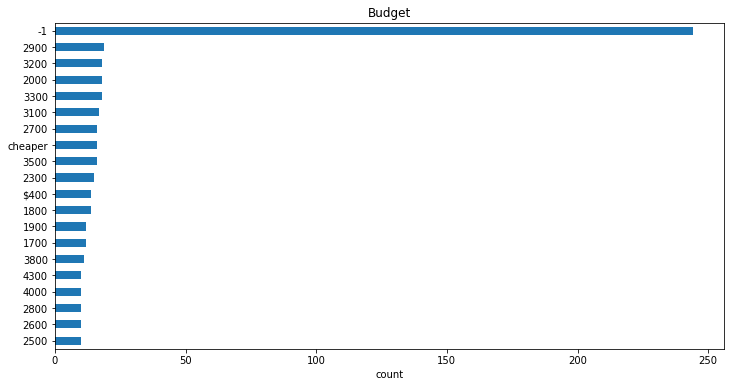

In [27]:
## Budget.
fig, (ax) = plt.subplots(ncols=1,figsize=(12,6))

_df = pd.DataFrame([turns['inform_budget'].value_counts().sort_values(ascending=False)]).transpose()
_df.head(20).plot.barh(legend=None, ax=ax).invert_yaxis()

plt.title('Budget')
plt.ylabel('')
plt.xlabel('count')
plt.show()

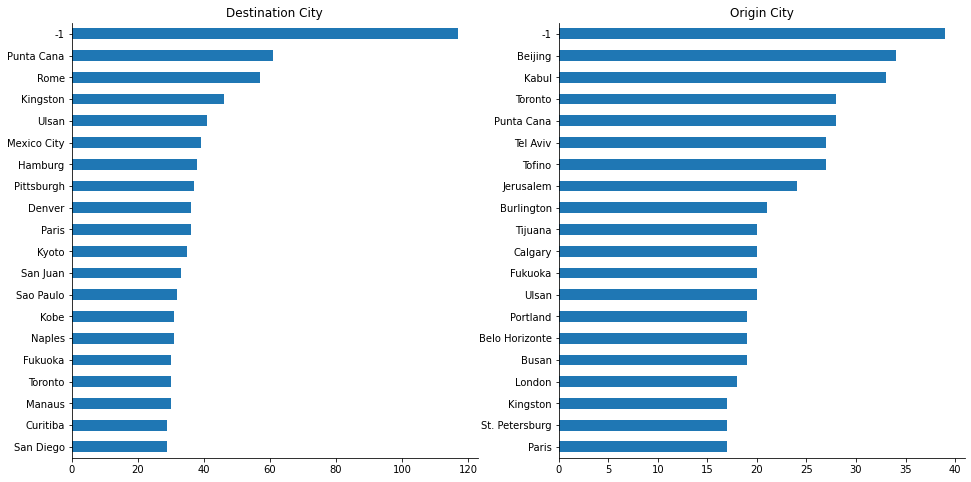

In [16]:
## Destination City & Origin City.
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,8))

ax1.title.set_text('Destination City')
_df = pd.DataFrame([turns['inform_dst_city'].value_counts().sort_values(ascending=False)]).transpose()
_df.head(20).plot.barh(legend=None, ax=ax1).invert_yaxis()

ax2.title.set_text('Origin City')
_df = pd.DataFrame([turns['inform_or_city'].value_counts().sort_values(ascending=False)]).transpose()
_df.head(20).plot.barh(legend=None, ax=ax2).invert_yaxis()

## remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

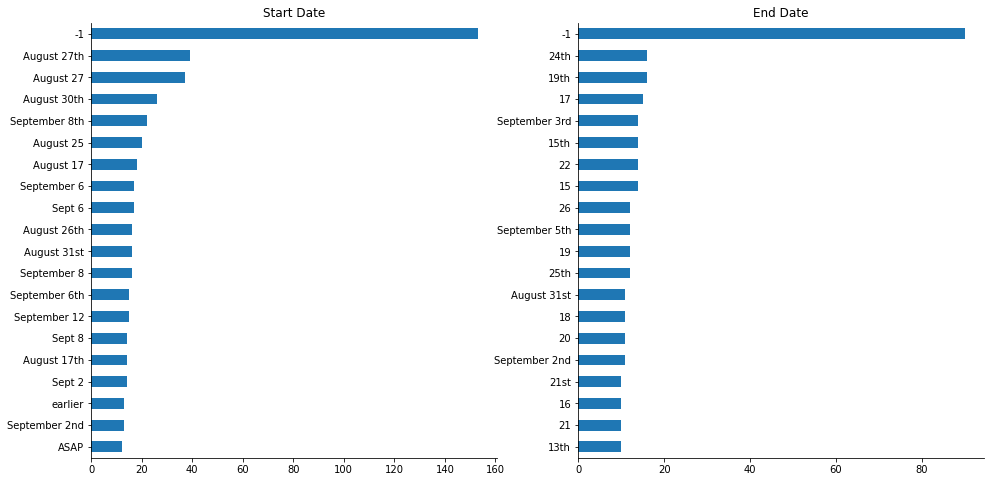

In [36]:
## Start Date & End Date.
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,8))

ax1.title.set_text('Start Date')
_df = pd.DataFrame([turns['inform_str_date'].value_counts().sort_values(ascending=False)]).transpose()
_df.head(20).plot.barh(legend=None, ax=ax1).invert_yaxis()

ax2.title.set_text('End Date')
_df = pd.DataFrame([turns['inform_end_date'].value_counts().sort_values(ascending=False)]).transpose()
_df.head(20).plot.barh(legend=None, ax=ax2).invert_yaxis()

## remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

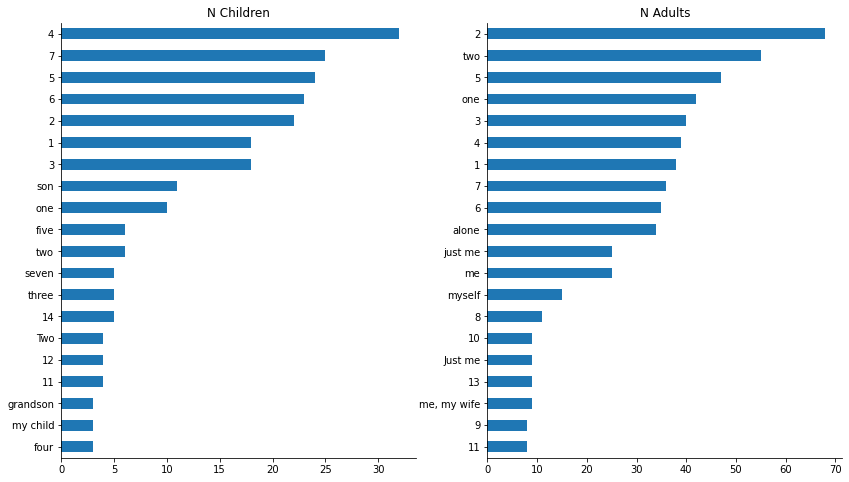

In [38]:
## N Adults & N Children.
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(14,8))

ax2.title.set_text('N Adults')
_df = pd.DataFrame([turns['inform_n_adults'].value_counts().sort_values(ascending=False)]).transpose()
_df.head(20).plot.barh(legend=None, ax=ax2).invert_yaxis()

ax1.title.set_text('N Children')
_df = pd.DataFrame([turns['inform_n_children'].value_counts().sort_values(ascending=False)]).transpose()
_df.head(20).plot.barh(legend=None, ax=ax1).invert_yaxis()

## remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

### 2.3 Extract the query texts that are of low difficulty level. What's the percentage of such queries in the dataset? Do the same for medium and high queries.

We will define the query text as the **users** first utterance. The difficulty levels are defined by how much information the utterance provides. 

The categories are defined as per the below.

**Low**
- Budget
- Destination City and Origin City
- Start Date and End Date
- N Adults and N Children

are fully specified.

**Medium**
- todo

**High**
- todo


In [ ]:
turns.head()

In [ ]:
first_utterances = turns.drop_duplicates(subset='id', keep='first')

## get rows that are not null for all conditions!!